In [30]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.opflow import StateFn
from qiskit.opflow import I, X, Y, Z

In [31]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import vector2latex

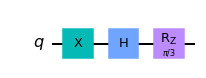

In [32]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)

qc.rz(np.pi/3, [0])
#qc.rx(np.pi/3, [0])

qc.draw('mpl')

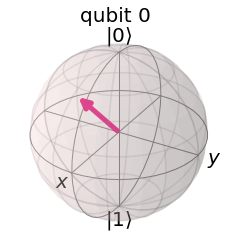

In [33]:
backend = Aer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

In [34]:
vector2latex(out_vector, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [35]:
operator1 = Z
psi = StateFn(qc)

In [36]:
expectation_value1 = (~psi @ operator1 @ psi).eval()
print('El valor esperado de la medición sobre el eje Z es:', expectation_value1.real)

El valor esperado de la medición sobre el eje Z es: 0.0


In [37]:
operator2 = X
expectation_value2 = (~psi @ operator2 @ psi).eval()
print('El valor esperado de la medición sobre el eje X es:', expectation_value2.real)

El valor esperado de la medición sobre el eje X es: -0.49999999999999994


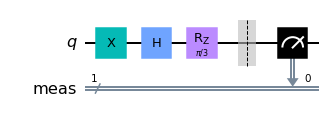

In [38]:
qc1 = qc.copy()
qc1.measure_all()
qc1.draw('mpl')

In [39]:
local_backend = Aer.get_backend('qasm_simulator') 
job = execute(qc1, local_backend, shots=2048) 
result = job.result()

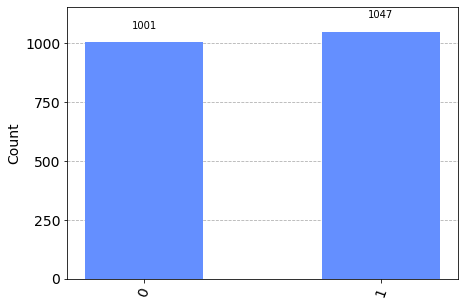

In [40]:
data = result.get_counts(qc1)
plot_histogram(data)

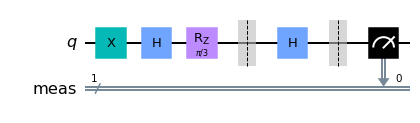

In [41]:
qc2 = qc.copy()
qc2.barrier()

qc2.h(0)
qc2.measure_all()
qc2.draw('mpl')

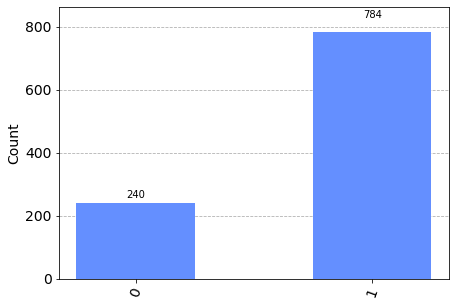

In [42]:
job2 = execute(qc2, local_backend, shots=1024) 
result2 = job2.result()

data2 = result2.get_counts(qc2)
plot_histogram(data2)

In [43]:
import qiskit.tools.jupyter
%qiskit_version_table